<a href="https://colab.research.google.com/github/naenumtou/ifrs9/blob/main/PD/heteroTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy.special import logit
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

%config InlineBackend.figure_format = 'retina'

In [2]:
# Import dependence variable
odr = pd.read_csv('https://raw.githubusercontent.com/naenumtou/ifrs9/main/PD/datasets/monthlyODR.csv')
odr = odr.query("Segment == 'CU'") #Select only one segment
odr = odr.eval("ODR = Bad / N") #ODR Calculation (12-Motnhs bad rate)

# Dependence variable transformation
# Logit transformation
y = logit(odr['ODR'])

# Import macroeconomics data (Independence variables)
mev = pd.read_csv('https://raw.githubusercontent.com/naenumtou/ifrs9/main/PD/datasets/macroTransformed.csv')

# Select variables for linear regression model
selectedVars = ['GDP_C_lg12', 'MPI_C_lg12']
X = sm.add_constant(mev[selectedVars]) #Add intercept

# Linear regression model
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    ODR   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     61.68
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           6.99e-15
Time:                        06:13:47   Log-Likelihood:                 100.82
No. Observations:                  59   AIC:                            -195.6
Df Residuals:                      56   BIC:                            -189.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9473      0.019   -155.761      0.0

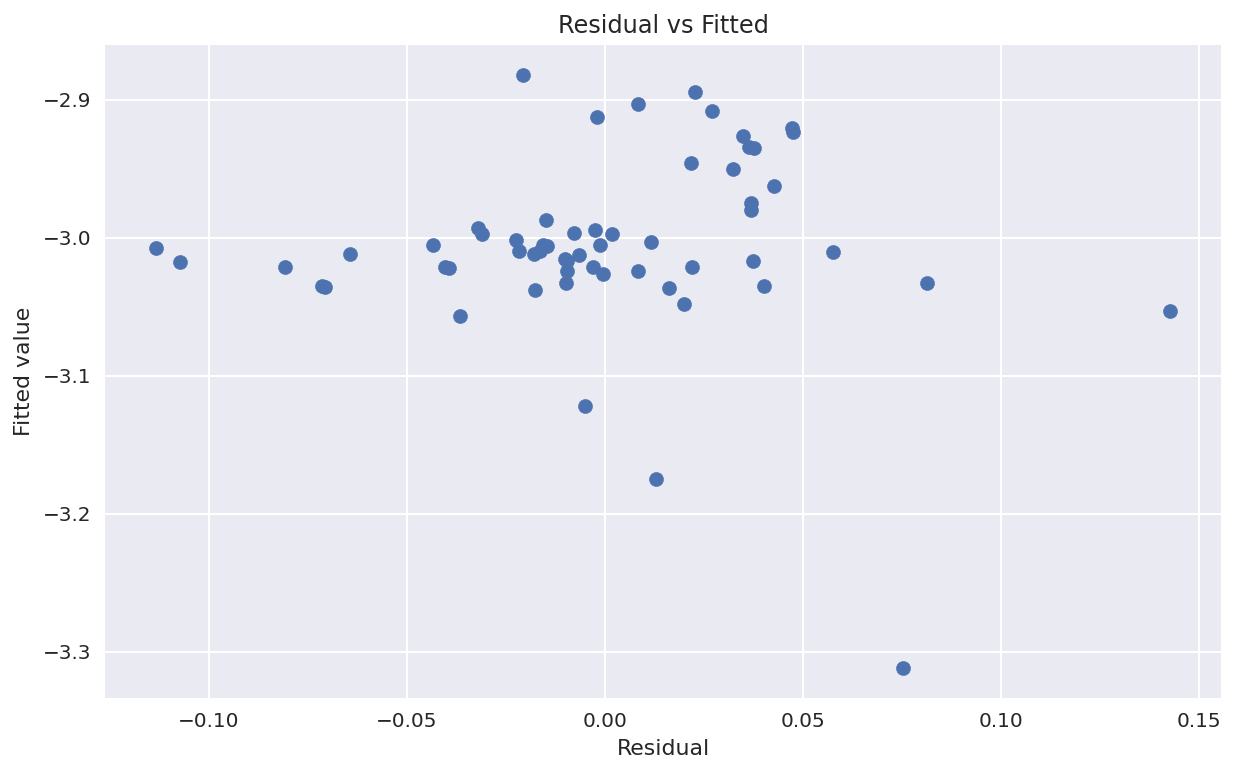

In [3]:
# Plot residual vs fitted value
plt.figure(figsize = (10, 6))
with plt.style.context('seaborn'):
  plt.scatter(result.resid, result.predict(X))
  plt.title('Residual vs Fitted')
  plt.xlabel('Residual')
  plt.ylabel('Fitted value')
plt.show()

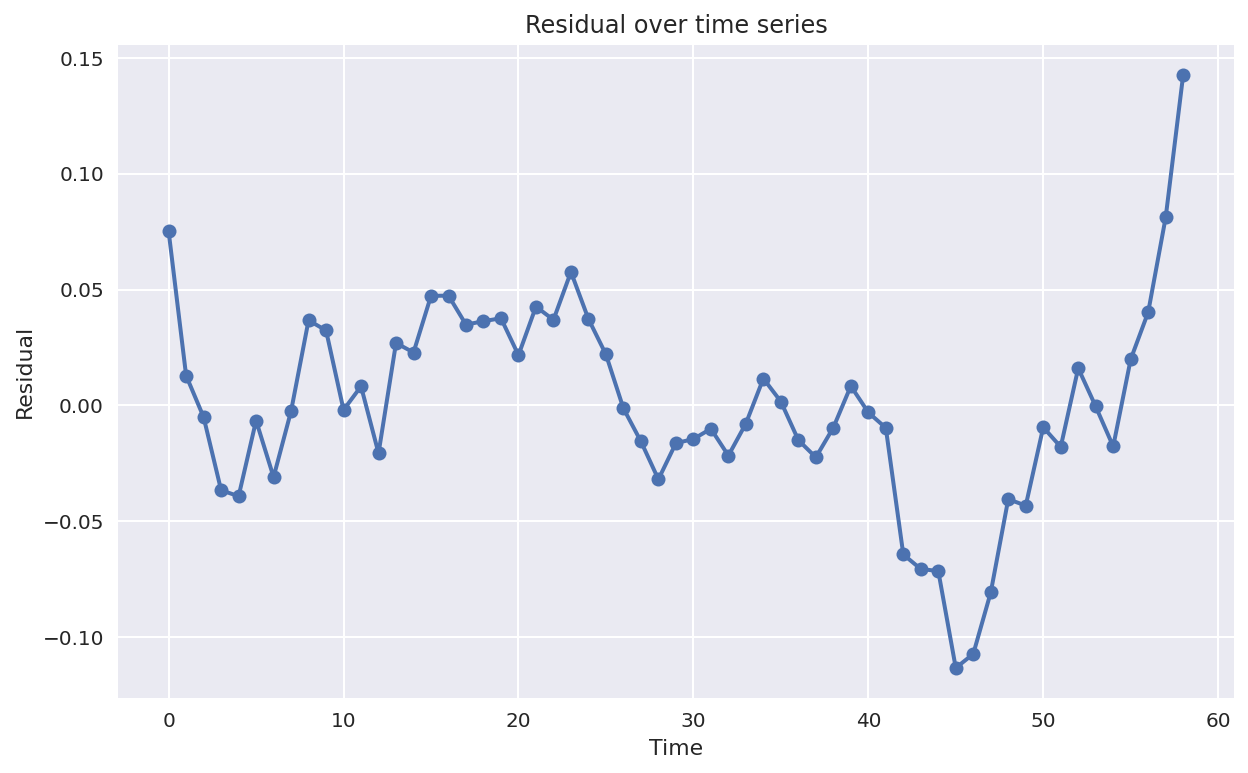

In [4]:
# Plot residual with time series
plt.figure(figsize = (10, 6))
with plt.style.context('seaborn'):
  plt.plot(result.resid,
           linewidth = 2,
           linestyle = '-',
           marker = 'o')
  plt.title('Residual over time series')
  plt.xlabel('Time')
  plt.ylabel('Residual')
plt.show()

#Statistical test for heteroscedasticity
##Hypotheses testing
*   The null hypothesis (H0): Homoscedasticity is presented.
*   The alternative hypothesis: (H1): Homoscedasticity is not presented.

##Interpretation
*   If p-value greater than alpha, the null hypothesis cannot be rejected. Hence, there is a homoscedasticity. (No heteroscedasticity)
*   If p-value less than alpha, the null hypothesis can be rejected. Hence, there is no homoscedasticity. (Heteroscedasticity)

In [5]:
# White test
whiteResults = het_white(result.resid, X)
whiteLabels = ['Lagrange Multiplier statistic:',
               'LM test p-value:',
               'F-statistic:',
               'F-test p-value:']

for i, label in enumerate(whiteLabels):
  print(f'{label} {whiteResults[i]:.4f}')

# Result (Using F-Test's p-value)
alpha = 0.05
if whiteResults[3] > alpha:
  print('Residual errors are homoscedasticity')
else:
  print('Residual erroes are heteroscedastisticity')

Lagrange Multiplier statistic: 6.9122
LM test p-value: 0.2273
F-statistic: 1.4066
F-test p-value: 0.2370
Residual errors are homoscedasticity


In [6]:
# Breusch-Pagan test
BPResults = het_breuschpagan(result.resid, X)
BPLabels = ['Lagrange Multiplier statistic:',
            'LM test p-value:',
            'F-statistic:',
            'F-test p-value:']

for i, label in enumerate(BPLabels):
  print(f'{label} {BPResults[i]:.4f}')

# Result (LM test's p-value)
alpha = 0.05
if BPResults[1] > alpha:
  print('Residual errors are homoscedasticity')
else:
  print('Residual erroes are heteroscedastisticity')

Lagrange Multiplier statistic: 4.1140
LM test p-value: 0.1278
F-statistic: 2.0987
F-test p-value: 0.1322
Residual errors are homoscedasticity
